In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import bean as be

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
plt.style.use('jr')
plt.rcParams["pdf.use14corefonts"] = True
matplotlib.rcParams['pdf.fonttype'] = 42 
matplotlib.rcParams["axes.unicode_minus"] = False

## LDL-C GWAS library

In [4]:
bdata = be.read_h5ad("../../../results/mapped_guideedits/LDLvar/bean_count_LDLvar.h5ad")

In [5]:
bdata.samples.index

Index(['rep1_bot', 'rep1_bulk', 'rep2_top', 'rep2_bot', 'rep2_bulk',
       'rep3_top', 'rep3_bot', 'rep3_bulk', 'rep4_top', 'rep4_bot',
       'rep4_bulk', 'rep5_top', 'rep5_high', 'rep5_bulk', 'rep5_low',
       'rep5_bot', 'rep6_top', 'rep6_high', 'rep6_bulk', 'rep6_low',
       'rep6_bot', 'rep7_top', 'rep7_high', 'rep7_bulk', 'rep7_low',
       'rep7_bot', 'rep8_top', 'rep8_high', 'rep8_bulk', 'rep8_low',
       'rep8_bot', 'rep9_top', 'rep9_high', 'rep9_bulk', 'rep9_low',
       'rep9_bot', 'rep10_top', 'rep10_high', 'rep10_bulk', 'rep10_low',
       'rep10_bot', 'rep11_top', 'rep11_high', 'rep11_bulk', 'rep11_low',
       'rep11_bot', 'rep12_top', 'rep12_high', 'rep12_bulk', 'rep12_low',
       'rep12_bot', 'rep13_top', 'rep13_high', 'rep13_bulk', 'rep13_low',
       'rep13_bot', 'rep14_top', 'rep14_high', 'rep14_bulk', 'rep14_low',
       'rep14_bot', 'rep15_top', 'rep15_high', 'rep15_bulk', 'rep15_low',
       'rep15_bot', 'rep1.1_top', 'rep1.1_bot', 'rep1.1_bulk', 'rep2.1_top

### Combine technical replicates

In [6]:
reps, bins = zip(*bdata.samples.index.map(lambda s: s.split("_")))
bdata.samples["rep"] = reps
bdata.samples["bin"] = bins
bdata = bdata[:,~bdata.samples.rep.map(lambda s: "rep1" in s or "rep2" in s or "rep3" in s or "rep4" in s)]
bdata.uns['guide_allele_counts'] = bdata.uns['guide_edit_counts']
del bdata.uns['guide_edit_counts']
bdata_rep5 = bdata[:,bdata.samples.rep.map(lambda s: "rep5" in s)]

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [7]:
bdata.samples

,rep,bin
rep5_top,rep5,top
rep5_high,rep5,high
rep5_bulk,rep5,bulk
rep5_low,rep5,low
rep5_bot,rep5,bot
rep6_top,rep6,top
rep6_high,rep6,high
rep6_bulk,rep6,bulk
rep6_low,rep6,low
rep6_bot,rep6,bot


In [8]:
bdata_rep5_techrep1 = bdata_rep5[:,bdata_rep5.samples.rep == "rep5"]
bdata_rep5_techrep2 =  bdata_rep5[:,bdata_rep5.samples.rep == "rep5.1"]

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [9]:
bdata_rep5_techrep2.samples.index = bdata_rep5_techrep1.samples.index
bdata_rep5_techrep2.uns['guide_allele_counts'].columns = bdata_rep5_techrep1.uns['guide_allele_counts'].columns

In [10]:
bdata_rep5_comb = bdata_rep5_techrep1 + bdata_rep5_techrep2

In [11]:
bdata_rep5_comb.uns = bdata_rep5_techrep1.uns.copy()
bdata_rep5_comb.uns['guide_allele_counts'] = (bdata_rep5_comb.uns['guide_allele_counts'].set_index(["guide", "allele"]) + bdata_rep5_techrep2.uns['guide_allele_counts'].set_index(["guide", "allele"])).reset_index()

In [12]:
bdata_comb = be.concat([bdata_rep5_comb, bdata[:,~bdata.samples.rep.map(lambda s: "rep1" in s or "rep2" in s or "rep3" in s or "rep4" in s or "rep5" in s)]], axis=1)

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [13]:
bdata_comb.write("../../../results/mapped_guideedits/LDLvar/bean_count_LDLvar_combined.h5ad")

... storing 'rep' as categorical
... storing 'bin' as categorical


In [14]:
bdata_comb.uns.keys()

odict_keys(['target_base_change', 'tiling', 'guide_allele_counts'])

In [15]:
bdata.uns['selfedit_counts'] = bdata.get_edit_from_allele('guide_allele_counts', return_result=True)
bdata.uns['selfedit_counts']['is_target'] = bdata.uns['selfedit_counts'].apply(lambda row: row.edit.pos == bdata.guides.loc[row.guide, "Target base position in gRNA"]-1, axis=1)
bdata.uns['selfedit_counts_target'] = bdata.uns['selfedit_counts'].loc[bdata.uns['selfedit_counts'].is_target]
allele_edits = bdata.uns['selfedit_counts_target'].set_index("guide").loc[:,bdata.samples.index]

In [16]:
target_edits = allele_edits.reindex(bdata.guides.index).fillna(0).values

In [17]:
bdata.layers['guide_edited'] = target_edits
bdata.layers["X"] = bdata.X

In [18]:
counts = bdata.X.copy()
counts[counts < 10] = np.nan
bdata_edit_rates_reps = (target_edits / counts)[:,bdata.samples.index.map(lambda s: "bulk" in s)]

In [19]:
bdata_med_rates = np.nanmedian(bdata_edit_rates_reps, axis=0)

In [20]:
bdata_target_edit_rates = bdata.get_guide_edit_rate(edit_layer='guide_edited', count_layer="X", bcmatch_thres=10, return_result=True)

In [21]:
np.nanmedian(bdata_target_edit_rates)

0.25196499349130197

## LDLR tiling library

In [22]:
cdata = be.read_h5ad("../../../results/mapped_guideedits/LDLRCDS/bean_count_LDLRCDS.h5ad")

### Combine technical replicates

In [23]:
reps, bins = zip(*cdata.samples.index.map(lambda s: s.split("_")))
cdata.samples["rep"] = reps
cdata.samples["bin"] = bins
cdata = cdata[:,~cdata.samples.rep.map(lambda s: "rep1" in s or "rep2" in s or "rep3" in s or "rep4" in s)]
cdata.uns['guide_allele_counts'] = cdata.uns['guide_edit_counts']
del cdata.uns['guide_edit_counts']
cdata_rep56 = cdata[:,cdata.samples.rep.map(lambda s: "rep5" in s or "rep6" in s)]
cdata_rep56_techrep1 = cdata_rep56[:,:10]
cdata_rep56_techrep2 =  cdata_rep56[:,10:]

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/a

In [24]:
cdata_rep56_techrep2.samples.index = cdata_rep56_techrep1.samples.index
cdata_rep56_techrep2.uns['guide_allele_counts'].columns = cdata_rep56_techrep1.uns['guide_allele_counts'].columns

In [25]:
cdata_rep56_comb = cdata_rep56_techrep1 + cdata_rep56_techrep2

In [26]:
cdata_rep56_comb.uns = cdata_rep56_techrep1.uns.copy()
cdata_rep56_comb.uns['guide_allele_counts'] = (cdata_rep56_comb.uns['guide_allele_counts'].set_index(["guide", "allele"]) + cdata_rep56_techrep2.uns['guide_allele_counts'].set_index(["guide", "allele"])).reset_index()

In [27]:
cdata_comb = be.concat([cdata_rep56_comb, cdata[:,cdata.samples.rep.map(lambda s: s in ["rep7", "rep8", "rep9"])]], axis=1)

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [28]:
cdata_comb.write("../../../results/mapped_guideedits/LDLRCDS/bean_count_LDLRCDS_combined.h5ad")

... storing 'rep' as categorical
... storing 'bin' as categorical


In [29]:
cdata_comb.uns['guide_allele_counts_2_7'] = cdata_comb.filter_allele_counts_by_pos(rel_pos_start=2,rel_pos_end=8,allele_uns_key='guide_allele_counts', rel_pos_is_reporter=True)

120352 edits filtered from 123100 alleles.
mapping filtered alleles ...


Mapping alleles to closest filtered alleles: 100%|██████████████████████| 7488/7488 [00:56<00:00, 132.09it/s]


In [30]:
cdata_comb.uns['guide_allele_counts_2_7.A_G'] = cdata_comb.filter_allele_counts_by_base(allele_uns_key='guide_allele_counts_2_7')

12739 edits filtered from 27909 alleles.


Mapping alleles to closest filtered alleles: 100%|██████████████████████| 7095/7095 [00:37<00:00, 190.79it/s]


In [31]:
window_edits = cdata_comb.uns['guide_allele_counts_2_7.A_G'].groupby("guide")[cdata_comb.samples.index].sum().reindex(cdata_comb.guides.index)

In [32]:
#window_edits = window_edits.reindex(cdata_comb.guides.index).fillna(0).values
cdata_comb.layers['guide_edited'] = window_edits.fillna(0).values
cdata_comb.layers["X"] = cdata_comb.X
cdata_comb.guides['n_editable_site'] = cdata_comb.guides.sequence.map(
                lambda s: s[2:8].count("A"))
norm_counts = cdata_comb.X * cdata_comb.guides['n_editable_site'].values[:,None]
norm_counts[norm_counts < 10] = np.nan
cdata_comb_guide_edit_rates = (cdata_comb.layers['guide_edited'][:,np.where(cdata_comb.samples.index.map(lambda s: "bulk" in s))[0]].sum(axis=1)) / (norm_counts[:,np.where(cdata_comb.samples.index.map(lambda s: "bulk" in s))[0]].sum(axis=1))

In [33]:
cdata_guide_edit_rates_reps = ((cdata_comb.layers['guide_edited'] / (norm_counts))[:,np.where(cdata_comb.samples.index.map(lambda s: "bulk" in s))[0]])

In [34]:
cdata_med_rates = np.nanmedian(cdata_guide_edit_rates_reps, axis=0)

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/s

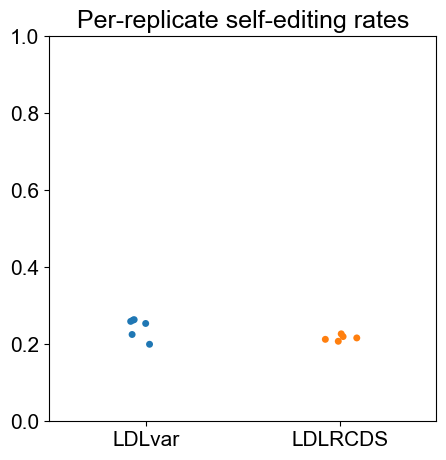

In [35]:
fig, ax = plt.subplots()
sns.stripplot([bdata_med_rates, cdata_med_rates, ], ax = ax)
ax.set_xticklabels(["LDLvar", "LDLRCDS"])
ax.set_ylim((0,1))
ax.set_title("Per-replicate self-editing rates")
fig.savefig("replicate_self_editing_rates.pdf")

In [36]:
np.nanmedian(cdata_comb_guide_edit_rates)

0.22396565462654439

## Comparison with reporter

In [37]:
bdata_reporter = be.read_h5ad("../../../results/mapped/LDLvar/bean_count_LDLvar_combined.copy.h5ad")

In [38]:
bdata_reporter.get_guide_edit_rate(edit_layer='edits', bcmatch_thres=10)

name
CONTROL_1_g1                0.385519
CONTROL_1_g2                0.788316
CONTROL_1_g3                0.549059
CONTROL_1_g4                0.113092
CONTROL_1_g5                0.274008
                              ...   
rs9987289_Maj_ABE_347_g1    0.201292
rs9987289_Maj_ABE_347_g2    0.446482
rs9987289_Maj_ABE_347_g3    0.211429
rs9987289_Maj_ABE_347_g4    0.184318
rs9987289_Maj_ABE_347_g5    0.238628
Name: edit_rate, Length: 3455, dtype: float64


In [41]:
editings = pd.DataFrame({"gRNA":bdata_target_edit_rates, "reporter":bdata_reporter.guides.edit_rate})

In [42]:
editings.to_csv("b_ldlvar_self_and_reporter_editing_rates.csv")

In [43]:
cdata_reporter = be.read_h5ad("../../../results/mapped/LDLRCDS/bean_count_LDLRCDS_combined.h5ad")

In [66]:
cdata_reporter.get_edit_from_allele()
cdata_reporter.get_edit_mat_from_uns(rel_pos_start=2, rel_pos_end=8)
cdata_reporter.guides['n_editable_site'] = cdata_reporter.guides.sequence.map(
                lambda s: s[2:8].count("A"))
bcmatch_norm = cdata_reporter.layers['X_bcmatch']
bcmatch_norm[bcmatch_norm < 10] = np.nan
bcmatch_norm = bcmatch_norm * cdata_reporter.guides['n_editable_site'].values[:,None]
cdata_reporter.layers['edit_rates'] = cdata_reporter.layers['edits'] / bcmatch_norm

/data/pinello/PROJECTS/2021_08_ANBE/software/crispr-bean/bean/framework/ReporterScreen.py:421: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  32 - 6 - guide_len[edits.guide_idx].reset_index(drop=True)


New edit matrix saved in .layers['edits']. Returning old edits.


/tmp/ipykernel_14591/1915605495.py:8: RuntimeWarning: invalid value encountered in true_divide
  cdata_reporter.layers['edit_rates'] = cdata_reporter.layers['edits'] / bcmatch_norm


In [67]:
cdata_reporter.get_guide_edit_rate(edit_layer='edits', bcmatch_thres=10, editable_base_start=2)

normalize by editable counts
name
5' UTR+pro_28_neg          NaN
5' UTR+pro_28_pos          NaN
5' UTR+pro_31_neg          NaN
5' UTR+pro_31_pos          NaN
5' UTR+pro_34_neg     0.340677
                        ...   
CBE_CONTROL_40_pos         NaN
CBE_CONTROL_96_pos         NaN
CBE_CONTROL_97_pos    0.508841
CBE_CONTROL_98_pos    0.573492
CBE_CONTROL_99_pos         NaN
Name: edit_rate, Length: 7500, dtype: float64


In [68]:
cdata_editings = pd.DataFrame({"gRNA":cdata_comb_guide_edit_rates, "reporter":cdata_reporter.guides.edit_rate})

In [69]:
cdata_editings.to_csv("d_ldlrcds_self_and_reporter_editing_rates.csv")

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/s

Text(0.8, 0.9, 'R=0.443')

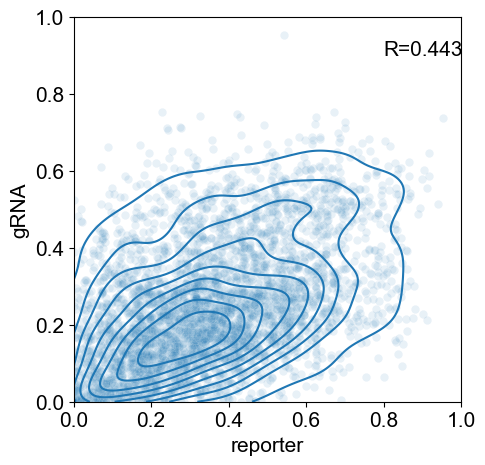

In [70]:
fig, ax = plt.subplots()

sns.scatterplot(data = cdata_editings, x="reporter", y = "gRNA", ax = ax, alpha=0.1) #clip=((0, 1), (0, 1)))
sns.kdeplot(data = cdata_editings, x="reporter", y = "gRNA", ax = ax, clip=((0, 1), (0, 1)))
#ax.set_xlim((0, 1))
ax.set_ylim((0, 1))
ax.text(0.8, 0.9, f"R={cdata_editings.corr().iloc[0, 1]:.3f}")

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-

WARNING @ Thu, 09 Nov 2023 15:58:33:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial 

WARNING @ Thu, 09 Nov 2023 15:58:33:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial 

WARNING @ Thu, 09 Nov 2023 15:58:33:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial 

WARNING @ Thu, 09 Nov 2023 15:58:33:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial 

WARNING @ Thu, 09 Nov 2023 15:58:33:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial 

WARNING @ Thu, 09 Nov 2023 15:58:33:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial 

WARNING @ Thu, 09 Nov 2023 15:58:33:
	 findfont: Generic family 'sans-serif' not found because none of the following familie

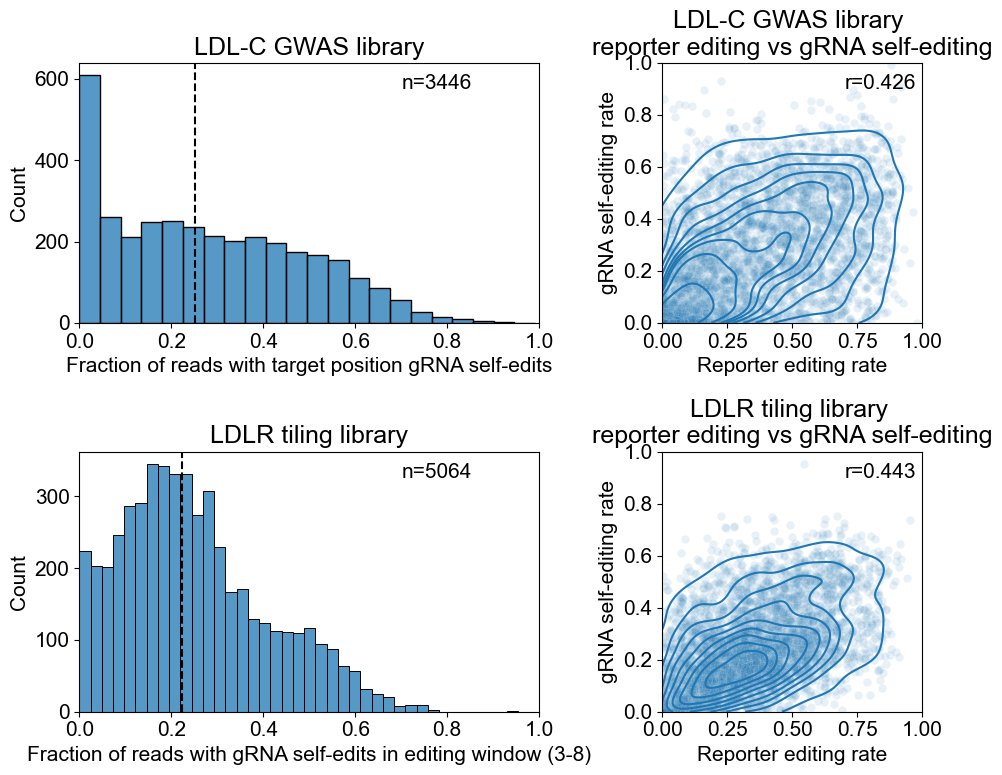

In [72]:
plt.style.use('jr')
fig, ax = plt.subplots(2, 2, figsize=(10,8), width_ratios=[0.6, 0.4])
sns.histplot(bdata_target_edit_rates, ax = ax[0, 0])
ax[0, 0].text(0.7, 0.9, f"n={(~np.isnan(bdata_target_edit_rates)).sum()}", transform=ax[0,0].transAxes)
ax[0, 0].axvline(np.nanmedian(bdata_target_edit_rates), linestyle='--', color='black')
ax[0, 0].set_xlabel("Fraction of reads with target position gRNA self-edits")
ax[0, 0].set_xlim((0,1))
ax[0, 0].set_title("LDL-C GWAS library")

sns.histplot(cdata_comb_guide_edit_rates, ax = ax[1, 0])
ax[1, 0].text(0.7, 0.9, f"n={(~np.isnan(cdata_comb_guide_edit_rates)).sum()}", transform=ax[1,0].transAxes)
ax[1, 0].axvline(np.nanmedian(cdata_comb_guide_edit_rates), linestyle='--', color='black')
ax[1, 0].set_xlabel("Fraction of reads with gRNA self-edits in editing window (3-8)")
ax[1, 0].set_xlim((0,1))
ax[1, 0].set_title("LDLR tiling library")

sns.scatterplot(data = editings, x="reporter", y = "gRNA", ax = ax[0, 1], alpha=0.1, rasterized=True) #clip=((0, 1), (0, 1)))
sns.kdeplot(data = editings, x="reporter", y = "gRNA", ax = ax[0, 1], clip=((0, 1), (0, 1)))
ax[0, 1].set_xlim((0, 1))
ax[0, 1].set_ylim((0, 1))
ax[0, 1].set_title("LDL-C GWAS library \nreporter editing vs gRNA self-editing")
ax[0, 1].set_box_aspect(1)
ax[0, 1].set_xlabel("Reporter editing rate")
ax[0, 1].set_ylabel("gRNA self-editing rate")
ax[0, 1].text(0.7, 0.9, f"r={editings.corr().iloc[0, 1]:.3f}", transform = ax[0, 1].transAxes)

sns.scatterplot(data = cdata_editings, x="reporter", y = "gRNA", ax = ax[1,1], alpha=0.1, rasterized=True) #clip=((0, 1), (0, 1)))
sns.kdeplot(data = cdata_editings, x="reporter", y = "gRNA", ax = ax[1,1], clip=((0, 1), (0, 1)))
ax[1,1].set_xlim((0, 1))
ax[1,1].set_ylim((0, 1))
ax[1, 1].set_title("LDLR tiling library \nreporter editing vs gRNA self-editing")
ax[1,1].set_box_aspect(1)
ax[1, 1].set_xlabel("Reporter editing rate")
ax[1, 1].set_ylabel("gRNA self-editing rate")
ax[1,1].text(0.7, 0.9, f"r={cdata_editings.corr().iloc[0, 1]:.3f}", transform=ax[1, 1].transAxes)

plt.tight_layout()
fig.savefig("SX_self_editing.pdf")